In [7]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import albumentations as A

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=10):
    """Visualizes a single bounding box on the image"""
    x_c, y_c, w, h = bbox
    height, width, channels = img.shape
    x_min, x_max, y_min, y_max = int((x_c - w/2)*width), int((x_c + w/2)*width), int((y_c - h/2)*height), int((y_c + h/2)*height)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    #for bbox, category_id in zip(bboxes, category_ids):
    #    class_name = category_id_to_name[category_id]
    #    img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    #plt.axis('off')
    plt.imshow(img)

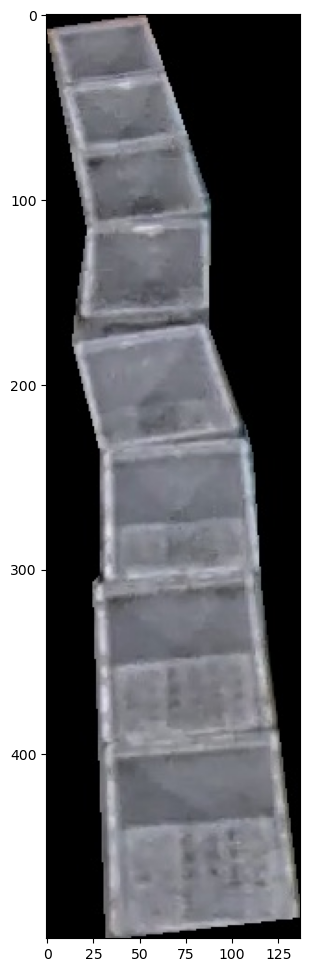

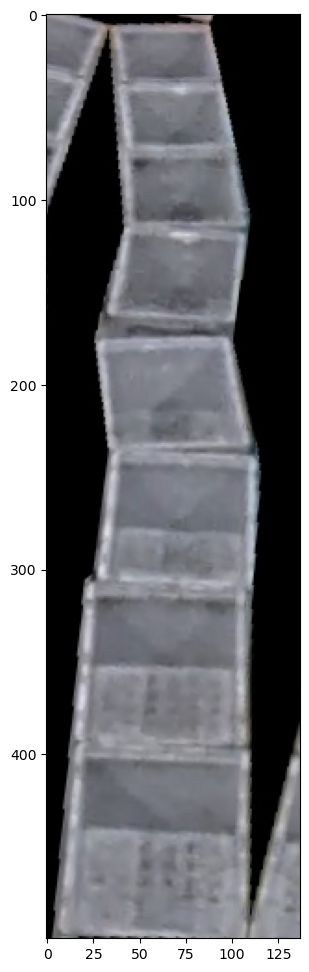

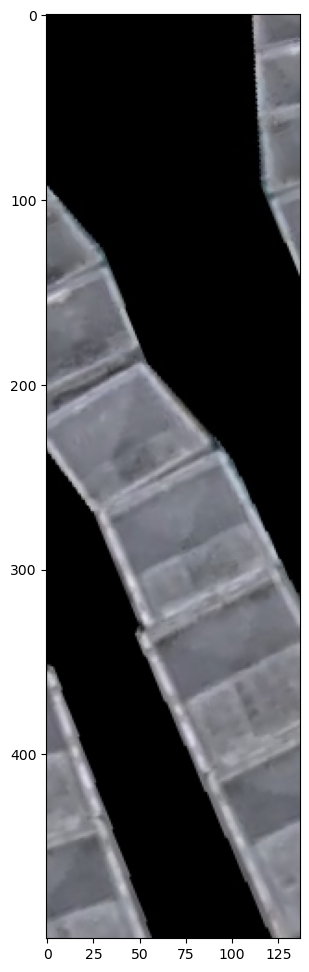

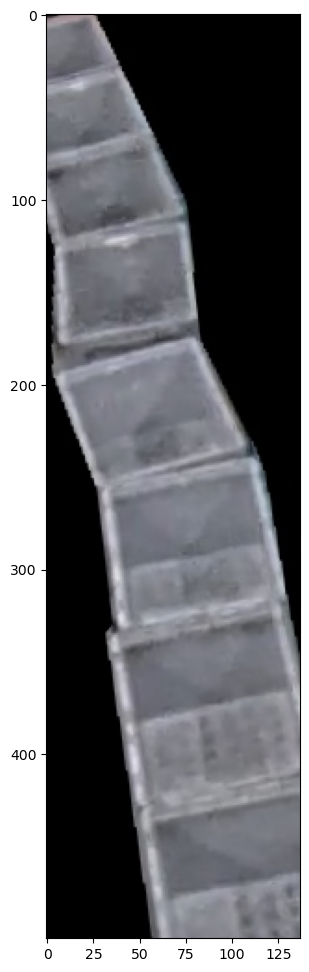

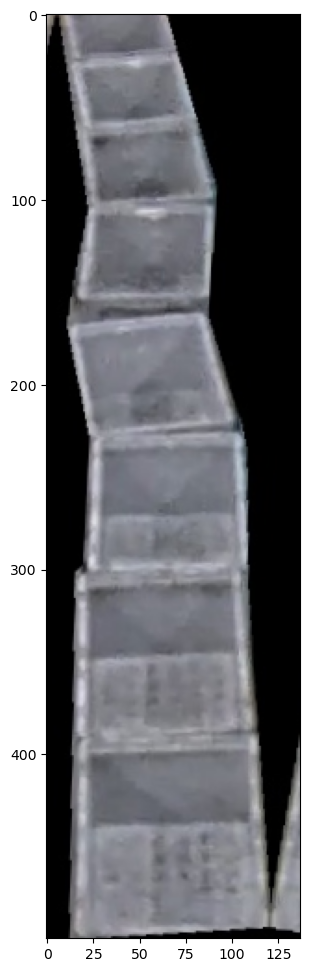

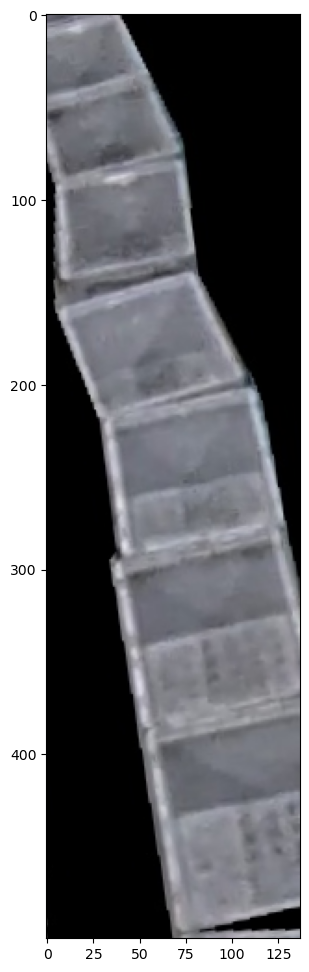

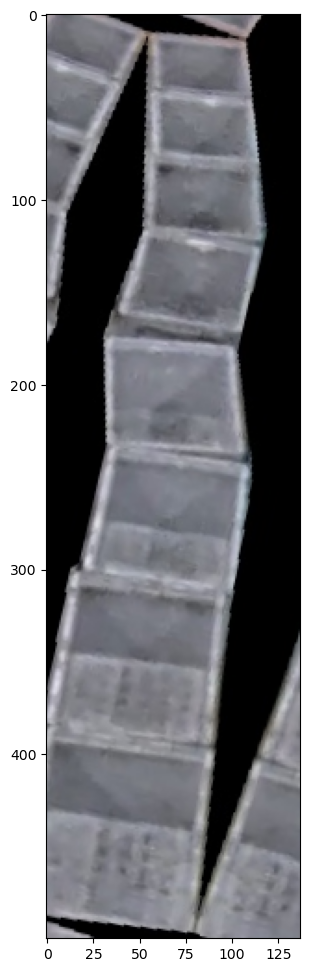

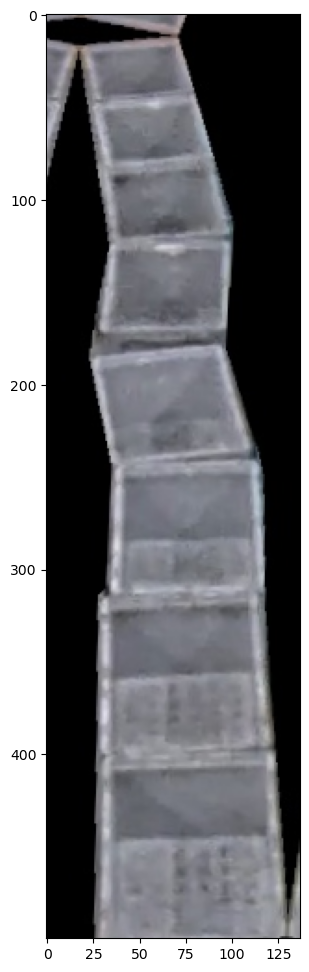

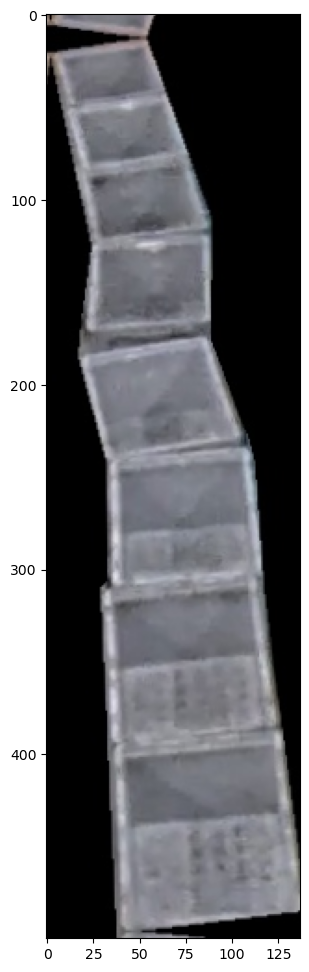

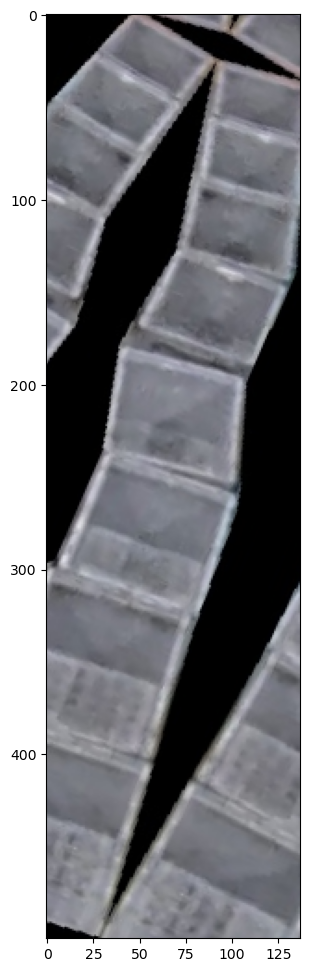

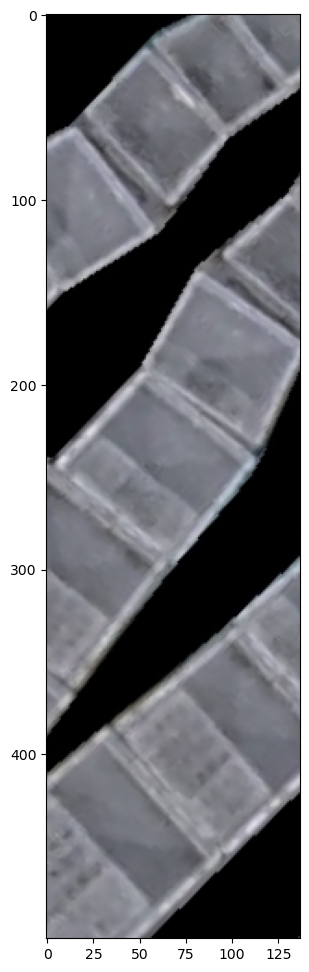

In [15]:
cat2name=["Box_3G","Box_4G","Box_8G","Box_B4","Box_B8"]

transform = A.Compose(
    [
        # Pixels
        #A.RandomBrightnessContrast(p=1),
        #A.RandomGamma(gamma_limit=(500), p=1), # faible -> lumineux 
        #A.ISONoise(intensity=(1, 11), p=1),
        #A.MultiplicativeNoise(multiplier= (0.4,4) , p=1), # effet de saturation
        #A.GaussNoise(var_limit=(100, 300), mean=100, p=1), # mean haut donne image lumineuse, val haut donne plus de bruit 
        #A.CLAHE(clip_limit = 1, tile_grid_size = (100,100), p=1), # add contrast
        #A.RandomSunFlare( p=1),
        
        # Spatial
        #A.BBoxSafeRandomCrop(p=1),
        #A.HorizontalFlip(p=0.5), # p=1 -> assure d'avoir l'image miroir
        #A.Rotate(limit=(-20, 20), p=1), # voir quel angles sont raisonnables
        #A.PixelDropout(p=1),
        #A.RandomScale(1,p=1),
        #A.SafeRotate(limit=(-20, 20), p=1)
        A.ShiftScaleRotate(p=1)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']), #dans BbowParams on peut ajouter des paramètres de tailles... utile pour les boites qui deviendraient trop petites
)

image = cv2.imread("test3.jpg") # lire l'image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # mettre les couleurs dans le bon ordre
bboxes =[]
category_ids =[]
with open("test.txt", "r") as label_file:
    for line in label_file:
        split_line = line.split(' ')
        bboxes.append([float(split_line[1]), float(split_line[2]), float(split_line[3]), float(split_line[4])])
        category_ids.append(int(split_line[0]))
visualize(image, bboxes, category_ids, cat2name)

'''
Création des images augmentées
'''
for ind in range(10):
    transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
    visualize(
        transformed['image'],
        transformed['bboxes'],
        transformed['category_ids'],
        cat2name,
    )

